In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l1, l2
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
from sklearn.decomposition import PCA

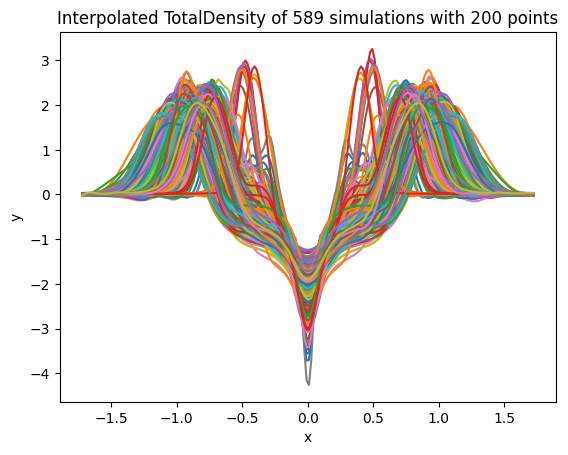

In [2]:
FF_df = pd.read_csv('form_factors.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_200.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_200.csv')

FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

for i in range(0,613):
    TD_y_df[i] = TD_y_df[i]-round((TD_y_df[i][0]+TD_y_df[i][199])/2,3)
    
FF_df = (FF_df-FF_df.mean())/FF_df.std()
TD_x_df = (TD_x_df-TD_x_df.mean())/TD_x_df.std()
TD_y_df = (TD_y_df-TD_y_df.mean())/TD_y_df.std()

outlier_column_indexes = set([])

index = 0
for value in TD_y_df.iloc[99]:
    if value > -1:
        outlier_column_indexes.add(index)
    index = index + 1

index = 0 
for value in TD_y_df.iloc[5]:
    if value > 0.30:
        outlier_column_indexes.add(index)
    index = index + 1
    
index = 0 
for value in TD_y_df.iloc[15]:
    if value > 0.30:
        outlier_column_indexes.add(index)
    index = index + 1

FF_df = FF_df.drop(outlier_column_indexes, axis=1)
TD_x_df = TD_x_df.drop(outlier_column_indexes, axis=1)
TD_y_df = TD_y_df.drop(outlier_column_indexes, axis=1)

for i in TD_y_df.columns:
    TD_y_df[i] = TD_y_df[i]-round((TD_y_df[i][0]+TD_y_df[i][199])/2,3)
    
i = 0
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    i = i + 1
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of ' + str(i) + ' simulations with 200 points')
plt.show()

In [3]:
FF_inc_df = pd.DataFrame(index=range(2000),columns=FF_df.columns)

for column in FF_df.columns:
    values = []
    increment = 0
    for value in FF_df[column]:
        values.append(value)
        values.append(increment)
        increment = increment + 0.001
    
    FF_inc_df[column] = values
    
FF_inc_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976,-0.427894,0.672328,-0.105556
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461,-0.428323,0.671703,-0.105924
3,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
4,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915,-0.429612,0.669829,-0.107030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,...,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000
1996,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230,-0.760337,-0.640635,-0.748932
1997,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,...,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000
1998,-0.636038,-0.761180,-0.771495,-0.743684,-0.668483,-0.761346,-0.747956,-0.655498,-0.668877,-0.778360,...,-0.857847,-0.769097,-0.703954,-0.866470,-0.693590,-0.738105,-0.678494,-0.759994,-0.640617,-0.748596


In [77]:
FF_pca = PCA(n_components=50)
PCA_FF_inc = FF_pca.fit_transform(FF_inc_df.transpose())
PCA_FF_inc_df = pd.DataFrame(PCA_FF_inc.T,columns=FF_df.columns)

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,0.000033,0.010057,0.002887,0.009233,-0.005313,-0.002691,0.017820,-0.001422,0.002348,-0.000547,...,0.008723,0.000358,-0.000685,0.003384,0.005572,0.001498,0.008311,-0.003606,-0.000929,-0.030157
1,0.005281,0.005045,0.002097,0.002070,0.003170,-0.014563,0.003175,-0.001356,0.003239,0.001350,...,0.018350,0.003843,0.000678,0.001418,0.016458,0.001285,0.019183,0.001995,0.001921,0.012406
2,0.007669,-0.000403,0.001040,-0.001849,0.006195,-0.020899,-0.002229,-0.002830,0.005980,0.002008,...,0.019525,0.003770,0.000953,0.000472,0.016859,0.000929,0.016279,0.004938,0.003077,0.036242
3,0.008989,-0.003850,0.000266,-0.003323,0.006168,-0.023013,-0.001746,-0.004084,0.008308,0.002037,...,0.016362,0.000978,0.000744,0.001394,0.014781,0.000802,0.009266,0.006368,0.003261,0.045904
4,0.009950,-0.004699,-0.000087,-0.003178,0.004777,-0.022278,0.001579,-0.004358,0.009250,0.001828,...,0.012431,-0.003700,0.000416,0.003616,0.013904,0.000999,0.003950,0.006804,0.003007,0.045806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.008359,-0.004231,0.001067,-0.003170,0.003185,-0.027228,-0.002980,-0.005534,0.008395,0.002452,...,0.009659,0.001323,0.000036,0.004557,0.016151,0.000340,0.021663,0.004075,0.002616,0.029559
196,0.007649,-0.002702,0.002124,-0.003536,0.004131,-0.026316,-0.005620,-0.008656,0.006618,0.002872,...,0.012337,0.005618,-0.000246,0.005411,0.020865,0.000688,0.021436,-0.002769,0.003015,0.033099
197,0.006775,-0.001992,0.002720,-0.004670,0.005269,-0.022067,-0.009041,-0.009890,0.003948,0.002871,...,0.012628,0.007789,-0.000337,0.006008,0.023162,0.000980,0.017806,-0.007580,0.003085,0.035655
198,0.004961,-0.003726,0.001607,-0.006792,0.005848,-0.012993,-0.013071,-0.007382,0.000807,0.002134,...,0.007383,0.006575,0.000052,0.004357,0.016917,0.000703,0.008904,-0.006880,0.002310,0.035493


In [107]:
names = []
for i in TD_x_df.columns:
    names.append(i)

TD_df = pd.DataFrame(index=range(400),columns=[names])

for column in TD_x_df.columns:
    value = []
    for index in range(0,200):
        value.append(TD_x_df[column][index])
        value.append(TD_y_df[column][index])
    
    TD_df[column] = value
    
TD_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,...,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098
1,0.000033,0.010057,0.002887,0.009233,-0.005313,-0.002691,0.017820,-0.001422,0.002348,-0.000547,...,0.008723,0.000358,-0.000685,0.003384,0.005572,0.001498,0.008311,-0.003606,-0.000929,-0.030157
2,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,...,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821
3,0.005281,0.005045,0.002097,0.002070,0.003170,-0.014563,0.003175,-0.001356,0.003239,0.001350,...,0.018350,0.003843,0.000678,0.001418,0.016458,0.001285,0.019183,0.001995,0.001921,0.012406
4,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,...,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.006775,-0.001992,0.002720,-0.004670,0.005269,-0.022067,-0.009041,-0.009890,0.003948,0.002871,...,0.012628,0.007789,-0.000337,0.006008,0.023162,0.000980,0.017806,-0.007580,0.003085,0.035655
396,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,...,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821
397,0.004961,-0.003726,0.001607,-0.006792,0.005848,-0.012993,-0.013071,-0.007382,0.000807,0.002134,...,0.007383,0.006575,0.000052,0.004357,0.016917,0.000703,0.008904,-0.006880,0.002310,0.035493
398,1.719098,1.719098,1.719098,1.719098,1.719098,1.719098,1.719098,1.719098,1.719098,1.719098,...,1.719098,1.719098,1.719098,1.719098,1.719098,1.719098,1.719098,1.719098,1.719098,1.719098


In [108]:
TD_pca = PCA(n_components=100)
PCA_TD = TD_pca.fit_transform(TD_df.transpose())
PCA_TD_df = pd.DataFrame(PCA_TD.T,columns=TD_df.columns)

#inverse_df = pd.DataFrame(TD_pca.inverse_transform(PCA_TD_df.T).T,columns=TD_y_df.columns)
#inverse_df

In [109]:
input_data = PCA_FF_inc_df.iloc[: ,:-14]
output_data = PCA_TD_df.iloc[: , :-14]

In [104]:
input_data

,0,1,2,3,4,5,6,7,8,9,...,589,590,591,592,593,594,595,596,597,598
0,7.654787,-2.034193,-4.219824,-7.757799,8.138070,-2.848673,2.657396,-0.277332,12.444425,-8.391003,...,-3.534187,-5.675299,-2.525757,-1.290617,5.765848,-3.949015,12.401853,6.459454,9.936947,-0.579153
1,0.941152,-3.481056,-1.609117,2.986543,-0.143747,-2.687459,-4.852447,-3.505413,3.987624,4.313842,...,-1.953363,1.781303,-3.270896,-4.503208,-1.764375,1.361962,7.088697,-3.838200,6.361056,-4.238510
2,7.796294,-1.676840,2.725638,-0.465298,-1.604321,-2.679951,-1.183603,-0.212012,-3.943223,1.335476,...,-2.787389,-2.955394,-2.492179,-2.233811,3.178965,-3.353545,5.149762,-1.372763,-5.640911,1.350207
3,1.215755,-0.378692,-1.090563,-0.594761,2.156626,-0.473291,-1.263296,0.666117,1.273873,-1.322460,...,-0.619433,-0.355823,-0.066668,-0.304315,2.427086,-1.046634,1.422887,2.861700,-3.533149,-0.196715
4,1.692831,-0.557337,-0.791839,-0.748964,-1.337515,-0.005076,3.571926,-0.806385,-1.585054,-0.409573,...,-0.089698,0.191023,-0.190529,0.479288,-2.503305,0.953121,0.901602,-0.535807,-2.810184,-0.586018
5,1.114264,0.581592,0.818791,0.647334,-1.468401,0.824866,-0.612020,-0.748420,2.554962,0.757640,...,0.743172,-0.174323,0.302971,0.508789,-1.996373,0.073893,5.334851,-1.065860,2.170054,2.506621
6,-0.157068,-0.658250,-0.059352,0.167368,-0.337054,-0.277599,3.013349,-0.648942,0.321154,0.836863,...,-0.399346,-0.834692,0.169063,1.335599,-0.310923,-1.345998,0.425621,0.496369,0.246463,-0.881361
7,-0.662522,0.921499,0.038558,-0.249768,-0.328549,-0.875433,0.184519,0.021117,0.055474,-0.430534,...,-0.792511,-0.714541,-0.464653,0.022998,0.343728,-1.359863,-0.328465,0.048671,0.344560,1.462608
8,-1.234202,0.525357,0.667878,-1.461448,-1.327929,0.258876,0.400800,0.383310,-0.288429,-1.451336,...,0.004834,-1.018224,0.332213,0.613744,-0.994858,-1.042299,0.089701,-1.056354,1.335572,0.784501
9,0.112269,-0.597242,-0.422873,0.442936,-0.566898,-0.225903,0.087181,-0.051225,-1.434925,0.704984,...,-0.310332,-0.013617,-0.351836,-0.258812,0.155830,0.276041,-1.981771,0.582416,1.725716,0.074908


In [110]:
output_data

,0,1,2,3,4,5,6,7,8,9,...,589,590,591,592,593,594,595,596,597,598
0,-1.129697e+00,4.439104e+00,-1.399994e+00,4.229866e+00,-3.281617e+00,4.377526e-01,-7.913739e+00,-6.713530e+00,-3.441603e+00,1.455014e+00,...,3.064694e-01,-5.287360e+00,-7.767846e+00,3.122977e-01,-3.282630e+00,1.704880e+00,-1.329300e+00,-4.463054e+00,7.915178e+00,-6.301416e+00
1,-2.157974e+00,-1.250306e+00,-1.885732e+00,-1.383638e+00,3.152346e-01,-1.966998e+00,3.647404e+00,2.452269e+00,2.131138e-01,-2.051611e+00,...,-1.862490e+00,1.296236e+00,4.185952e+00,-2.146489e+00,-2.608612e-01,-1.067469e+00,-2.087146e+00,8.529971e-02,3.144749e+00,2.454460e-01
2,-3.523766e+00,1.825231e+00,-1.388210e+00,4.685441e-01,-7.220424e-01,1.025801e+00,3.994492e+00,1.276122e+00,-1.483731e+00,-9.739389e-01,...,8.320049e-01,1.565019e+00,3.279304e+00,1.176030e+00,-2.102757e+00,1.295634e+00,-4.298806e+00,-2.675414e-03,1.228344e+00,-4.759309e-01
3,-9.131510e-01,-3.286199e-01,-1.656263e-01,-4.561146e-01,1.153885e+00,9.445081e-01,5.063710e-01,-1.099424e+00,1.786017e+00,-6.974973e-01,...,7.514916e-01,-1.070902e+00,-1.641553e+00,1.591523e+00,8.842241e-01,-3.509301e-01,2.805588e-01,1.335277e+00,-3.069512e-01,-4.254962e-01
4,-1.979023e-01,-4.133333e-01,1.228666e-01,6.049757e-01,2.245849e-02,5.954913e-01,-5.846314e-01,-6.932295e-01,-8.425104e-02,5.250066e-01,...,6.297699e-01,3.282794e-01,-8.114267e-01,6.427730e-02,-3.190426e-01,1.086079e+00,-4.810477e-01,-2.140961e-01,-2.565152e+00,-3.293823e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.557650e-11,6.926677e-11,-4.515143e-11,8.553740e-12,7.657074e-12,5.391707e-11,1.101739e-11,3.055267e-13,1.414597e-10,1.517081e-11,...,1.609426e-11,-1.107096e-11,7.873686e-12,4.901135e-11,-4.323077e-11,-3.784681e-11,1.871465e-12,1.030973e-10,2.698802e-12,7.169376e-12
96,-2.467625e-11,2.543493e-11,5.020413e-12,-8.485278e-13,-4.713273e-12,-3.511491e-13,-1.787791e-11,2.192261e-11,-2.092522e-11,5.328689e-12,...,-4.506609e-12,3.825258e-11,6.962243e-12,-5.513158e-11,4.253608e-11,7.438922e-12,-1.668255e-12,-2.602505e-11,1.750406e-11,6.196328e-13
97,-2.422772e-11,-6.423152e-12,-5.776442e-11,-1.935608e-11,-5.041551e-11,8.466780e-12,2.449112e-11,2.051951e-11,-8.171777e-11,-7.034863e-12,...,1.765902e-12,-5.739865e-12,-4.505691e-12,-6.379737e-13,-3.104695e-12,3.726113e-11,-6.437690e-13,-2.555658e-11,2.154165e-11,3.335162e-11
98,-8.963344e-12,2.700319e-11,3.682959e-11,1.155944e-12,2.177606e-11,7.613271e-12,1.786274e-11,-2.080214e-11,5.641291e-12,3.744010e-11,...,-1.358042e-11,-6.273414e-11,1.757380e-11,2.930577e-11,-2.113853e-13,-5.362176e-11,-1.675977e-13,3.705587e-11,6.454371e-11,-1.306361e-11


In [105]:
column_index = []
for i in input_data.columns:
    column_index.append(i)

random.seed(42)
train = random.sample(column_index,460)
test = []
for number in column_index:
    if not number in train:
        test.append(number)

print(train)
print(test)

[125, 28, 296, 264, 240, 153, 114, 581, 99, 454, 38, 35, 105, 235, 250, 539, 30, 214, 451, 237, 481, 299, 6, 174, 589, 367, 576, 170, 232, 362, 592, 104, 409, 109, 386, 371, 285, 51, 492, 138, 407, 90, 317, 390, 207, 79, 53, 245, 313, 91, 584, 113, 565, 571, 486, 393, 177, 399, 382, 226, 288, 81, 186, 595, 93, 248, 205, 149, 528, 495, 344, 562, 300, 123, 369, 540, 453, 413, 417, 31, 128, 442, 18, 434, 172, 216, 148, 39, 119, 489, 504, 306, 470, 563, 512, 508, 352, 269, 213, 474, 490, 346, 246, 535, 146, 552, 137, 401, 302, 290, 145, 402, 316, 231, 577, 315, 215, 196, 523, 77, 274, 266, 550, 406, 27, 462, 63, 87, 338, 547, 426, 572, 228, 322, 588, 208, 206, 463, 251, 561, 139, 298, 5, 465, 389, 65, 368, 289, 404, 147, 519, 345, 185, 64, 161, 234, 556, 244, 1, 452, 388, 542, 270, 410, 101, 273, 61, 337, 163, 526, 431, 328, 111, 469, 202, 433, 92, 291, 286, 0, 323, 176, 533, 9, 443, 479, 168, 133, 33, 134, 505, 47, 50, 394, 262, 41, 287, 71, 72, 355, 256, 596, 94, 559, 457, 327, 464, 501,

In [111]:
train_input_values = []
for number in train:
    train_input_values.append(input_data[number])
    
train_output_values = []
for number in train:
    train_output_values.append(output_data[number])

test_input_values = []
for number in test:
    test_input_values.append(input_data[number])
    
test_output_values = []
for number in test:
    test_output_values.append(output_data[number])
    
train_input_values = np.array(train_input_values).astype(np.float32)
train_output_values = np.array(train_output_values).astype(np.float32)
test_input_values = np.array(test_input_values).astype(np.float32)
test_output_values = np.array(test_output_values).astype(np.float32)

print(train_input_values.shape)
print(train_output_values.shape)
print(test_input_values.shape)
print(test_output_values.shape)

(460, 50)
(460, 100, 1)
(115, 50)
(115, 100, 1)


In [112]:
def loss(actual,prediction):
    length = int(len(prediction[0])/2)
    
    index = 0
    distance_average_sum = 0
    for data in prediction:
        p_x = data[0:length]
        p_y = data[length:]
        t_x = actual[index][0:length]
        t_y = actual[index][length:]
         
        distance_sum = 0
        for i in range(0,length):
            distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)
            
        distance_average_sum = distance_average_sum + distance_sum/length
        index = index + 1
        
    return (distance_average_sum)/len(prediction)

def plots(actual,prediction):
    random.seed(42)
    train = random.sample(range(0,len(test_input_values)),10)
    for number in train:
        length = int(len(prediction[0])/2)
        x_1 = prediction[number][0:length]
        y_1 = prediction[number][length:]
        plt.plot(x_1,y_1,c='b')

        x_2 = test_output_values[number][0:length]
        y_2 = test_output_values[number][length:]
        plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of the ten random predictions |blue| against actual |red|')
    plt.show() 
    
    index = 0
    for points in prediction:
        p_x = points[0:length]
        p_y = points[length:]
        plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
        t_x = test_output_values[index][0:length].tolist()
        t_y = test_output_values[index][length:].tolist()
        plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
        index = index + 1

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output scatterplot of prediction |blue| and actual |red| data')
    plt.show()
    
    number = 10
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
    
    number = 75
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
    
    number = 80
    prediction = model.predict(test_input_values)
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show()

In [113]:
inputs = keras.Input(shape=(50,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
outputs = layers.Dense(100)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=250),
             TensorBoard(log_dir='model_10_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense (Dense)               (None, 2000)              102000    
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_1 (Dropout)         (None, 2000)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               200100    
                                                                 
Total params: 4,304,100
Trainable params: 4,304,100
Non-train

Epoch 71/1500
8/8 [==============================] - 1s 156ms/step - loss: 0.1113 - val_loss: 0.1074
Epoch 72/1500
8/8 [==============================] - 1s 73ms/step - loss: 0.1113 - val_loss: 0.1074
Epoch 73/1500
8/8 [==============================] - 1s 74ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 74/1500
8/8 [==============================] - 1s 72ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 75/1500
8/8 [==============================] - 1s 71ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 76/1500
8/8 [==============================] - 1s 74ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 77/1500
8/8 [==============================] - 1s 70ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 78/1500
8/8 [==============================] - 1s 77ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 79/1500
8/8 [==============================] - 1s 71ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 80/1500
8/8 [==============================] - 1s 72ms/step - loss: 0.1112 - val_loss: 0.1074

8/8 [==============================] - 1s 108ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 153/1500
8/8 [==============================] - 1s 80ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 154/1500
8/8 [==============================] - 1s 77ms/step - loss: 0.1111 - val_loss: 0.1072
Epoch 155/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 156/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 157/1500
8/8 [==============================] - 1s 76ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 158/1500
8/8 [==============================] - 1s 71ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 159/1500
8/8 [==============================] - 1s 73ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 160/1500
8/8 [==============================] - 1s 72ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 161/1500
8/8 [==============================] - 1s 160ms/step - loss: 0.1110 - val_loss: 0.1072
Epo

8/8 [==============================] - 1s 80ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 234/1500
8/8 [==============================] - 1s 73ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 235/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 236/1500
8/8 [==============================] - 1s 71ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 237/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 238/1500
8/8 [==============================] - 1s 74ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 239/1500
8/8 [==============================] - 1s 83ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 240/1500
8/8 [==============================] - 1s 75ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 241/1500
8/8 [==============================] - 1s 202ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 242/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.1110 - val_loss: 0.1072
Epo

Epoch 314/1500
8/8 [==============================] - 1s 76ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 315/1500
8/8 [==============================] - 1s 94ms/step - loss: 0.1110 - val_loss: 0.1073
Epoch 316/1500
8/8 [==============================] - 1s 81ms/step - loss: 0.1110 - val_loss: 0.1073
Epoch 317/1500
8/8 [==============================] - 1s 85ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 318/1500
8/8 [==============================] - 1s 76ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 319/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.1110 - val_loss: 0.1073
Epoch 320/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 321/1500
8/8 [==============================] - 1s 169ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 322/1500
8/8 [==============================] - 1s 76ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 323/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.1110 - val_lo

8/8 [==============================] - 1s 77ms/step - loss: 0.1110 - val_loss: 0.1073
Epoch 396/1500
8/8 [==============================] - 1s 85ms/step - loss: 0.1110 - val_loss: 0.1073
Epoch 397/1500
8/8 [==============================] - 1s 73ms/step - loss: 0.1110 - val_loss: 0.1073
Epoch 398/1500
8/8 [==============================] - 1s 84ms/step - loss: 0.1110 - val_loss: 0.1073
Epoch 399/1500
8/8 [==============================] - 2s 222ms/step - loss: 0.1110 - val_loss: 0.1073
Epoch 400/1500
8/8 [==============================] - 3s 378ms/step - loss: 0.1110 - val_loss: 0.1073
Epoch 401/1500
8/8 [==============================] - 5s 770ms/step - loss: 0.1110 - val_loss: 0.1073
Epoch 402/1500
8/8 [==============================] - 2s 344ms/step - loss: 0.1110 - val_loss: 0.1073
Epoch 403/1500
8/8 [==============================] - 1s 122ms/step - loss: 0.1110 - val_loss: 0.1073
Epoch 404/1500
8/8 [==============================] - 1s 83ms/step - loss: 0.1110 - val_loss: 0.1073


4/4 [==============================] - 0s 5ms/step
0.23260959389537808
4/4 [==============================] - 0s 5ms/step


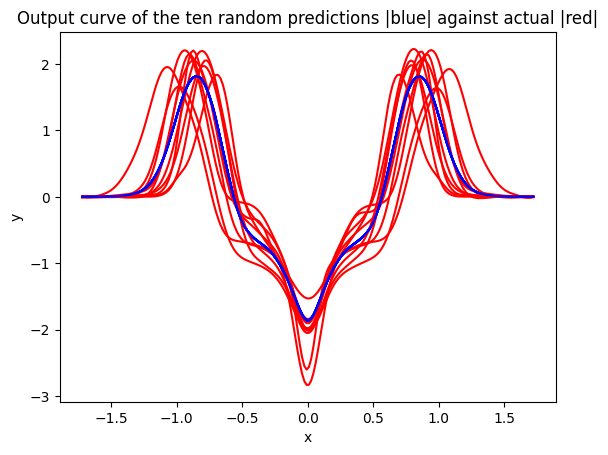

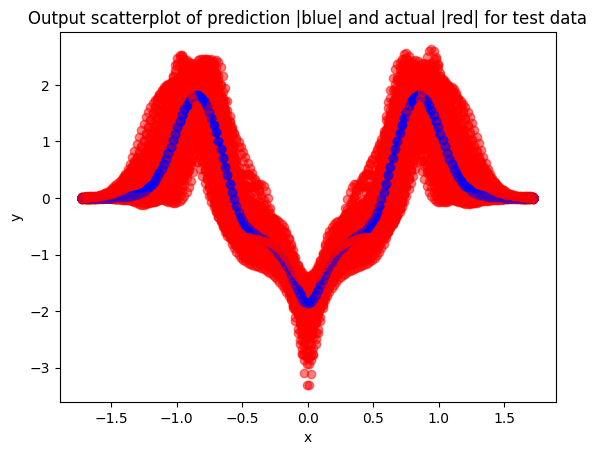

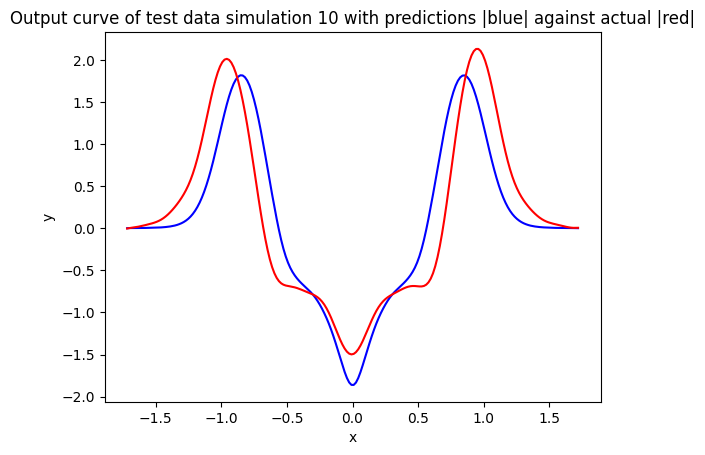

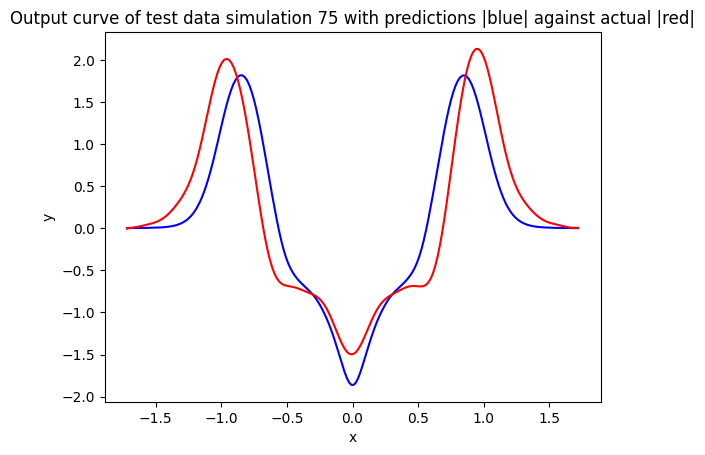

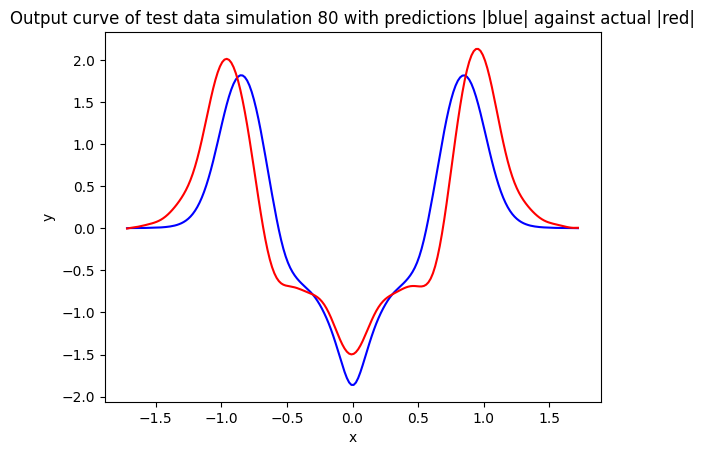

In [162]:
def loss(TD_pca,actual,prediction):
    test = TD_pca.inverse_transform((np.squeeze(actual, -1))).T
    pred = TD_pca.inverse_transform(prediction).T
    length = int(len(test[0]))
    
    distance_average_sum = 0
    for i in range(0,length):
        t_x = test[::2,i]
        t_y = test[1::2,i]
        p_x = pred[::2,i]
        p_y = pred[1::2,i]
        
        distance_sum = 0
        for i in range(0,len(p_y)):
            distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)
        
        distance_average_sum = distance_average_sum + distance_sum/len(p_y)
    
    return (distance_average_sum)/length

def plots(TD_pca,actual,prediction):
    test = TD_pca.inverse_transform((np.squeeze(actual, -1))).T
    pred = TD_pca.inverse_transform(prediction).T
    length = int(len(test[0]))
    
    random.seed(42)
    train = random.sample(range(0,length),10)
    for i in train:
        t_x = test[::2,i]
        t_y = test[1::2,i]
        p_x = pred[::2,i]
        p_y = pred[1::2,i]
        
        plt.plot(t_x,t_y,c='r')
        plt.plot(p_x,p_y,c='b')
        

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of the ten random predictions |blue| against actual |red|')
    plt.show() 
    
    for i in range(0,length):
        t_x = test[::2,i]
        t_y = test[1::2,i]
        p_x = pred[::2,i]
        p_y = pred[1::2,i]
        
        plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
        plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
        
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output scatterplot of prediction |blue| and actual |red| for test data')
    plt.show()
    
    number = 10
    plt.plot(pred[::2,number],pred[1::2,number],c='b')
    plt.plot(test[::2,i],test[1::2,i],c='r')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of test data simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
    
    number = 75
    plt.plot(pred[::2,number],pred[1::2,number],c='b')
    plt.plot(test[::2,i],test[1::2,i],c='r')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of test data simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
    
    number = 80
    plt.plot(pred[::2,number],pred[1::2,number],c='b')
    plt.plot(test[::2,i],test[1::2,i],c='r')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of test data simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
          
print(loss(TD_pca, test_output_values, model.predict(test_input_values)))
plots(TD_pca, test_output_values, model.predict(test_input_values))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense_3 (Dense)             (None, 2000)              102000    
                                                                 
 dropout_2 (Dropout)         (None, 2000)              0         
                                                                 
 dense_4 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_3 (Dropout)         (None, 2000)              0         
                                                                 
 dense_5 (Dense)             (None, 100)               200100    
                                                                 
Total params: 4,304,100
Trainable params: 4,304,100
Non-tra

8/8 [==============================] - 1s 78ms/step - loss: 0.1113 - val_loss: 0.1074
Epoch 71/1500
8/8 [==============================] - 1s 155ms/step - loss: 0.1113 - val_loss: 0.1074
Epoch 72/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 73/1500
8/8 [==============================] - 2s 247ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 74/1500
8/8 [==============================] - 4s 588ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 75/1500
8/8 [==============================] - 2s 309ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 76/1500
8/8 [==============================] - 1s 70ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 77/1500
8/8 [==============================] - 1s 74ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 78/1500
8/8 [==============================] - 1s 72ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 79/1500
8/8 [==============================] - 1s 68ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 80/1

8/8 [==============================] - 1s 155ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 152/1500
8/8 [==============================] - 1s 76ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 153/1500
8/8 [==============================] - 1s 75ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 154/1500
8/8 [==============================] - 1s 70ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 155/1500
8/8 [==============================] - 1s 72ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 156/1500
8/8 [==============================] - 1s 73ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 157/1500
8/8 [==============================] - 1s 72ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 158/1500
8/8 [==============================] - 1s 72ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 159/1500
8/8 [==============================] - 1s 73ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 160/1500
8/8 [==============================] - 1s 75ms/step - loss: 0.1110 - val_loss: 0.1072
Epoc

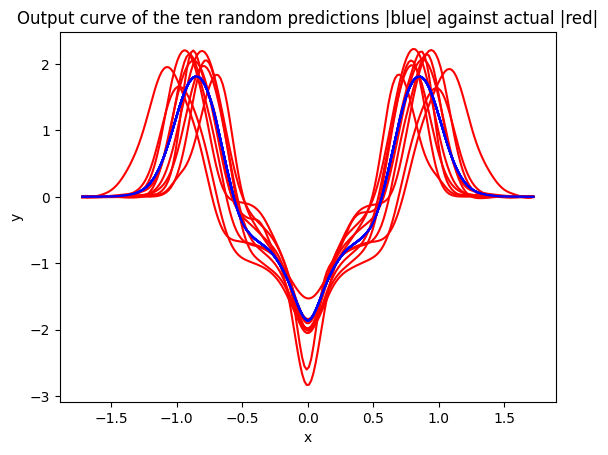

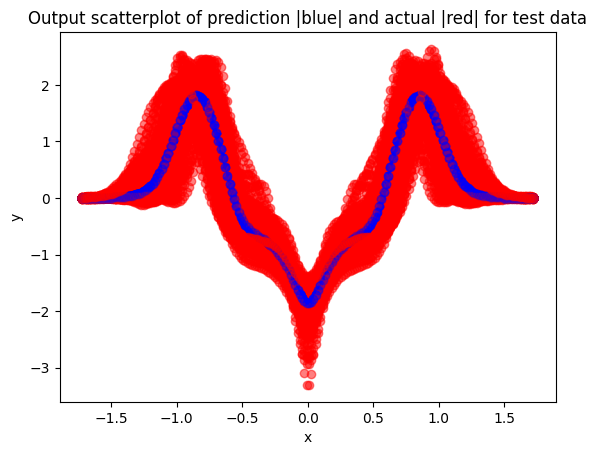

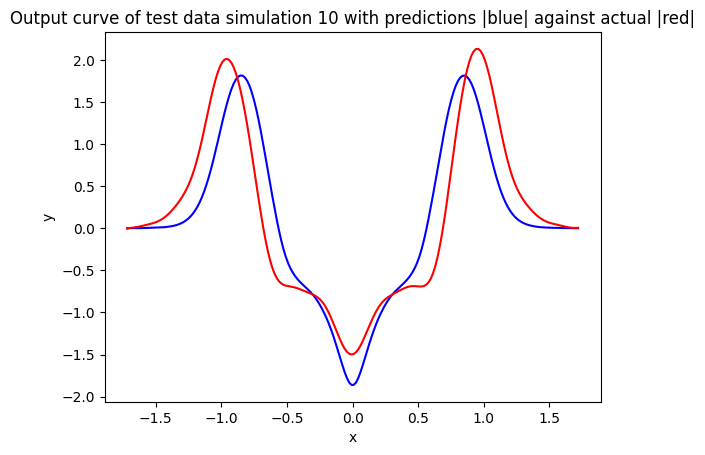

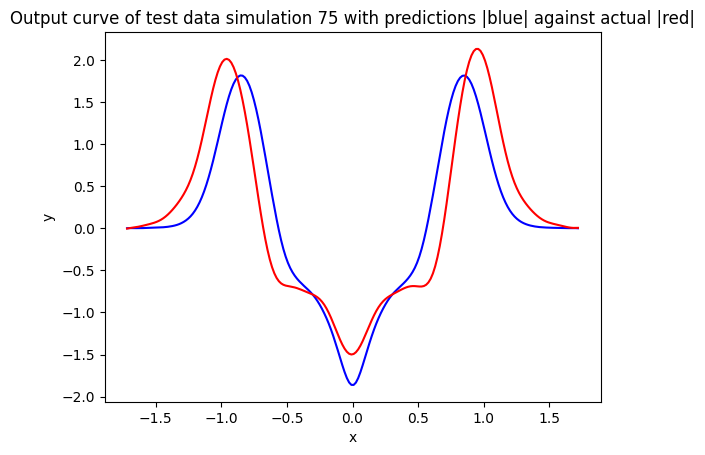

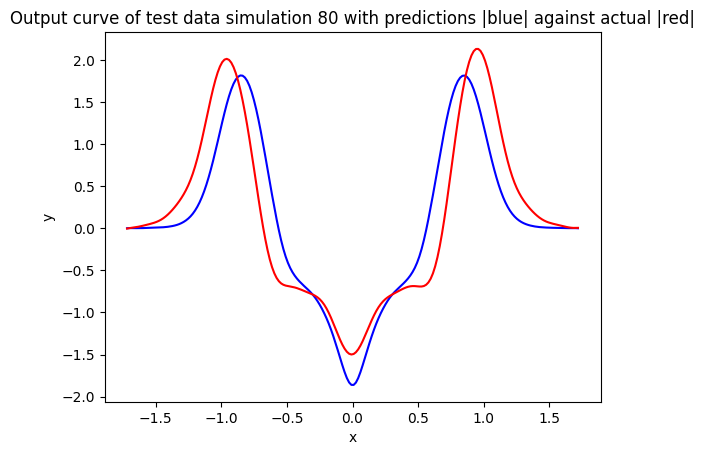

In [163]:
inputs = keras.Input(shape=(50,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
outputs = layers.Dense(100)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=50),
             TensorBoard(log_dir='model_10_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(TD_pca, test_output_values, model.predict(test_input_values))))
print('')
plots(TD_pca, test_output_values, model.predict(test_input_values))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense_6 (Dense)             (None, 2000)              102000    
                                                                 
 dropout_4 (Dropout)         (None, 2000)              0         
                                                                 
 dense_7 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_5 (Dropout)         (None, 2000)              0         
                                                                 
 dense_8 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_6 (Dropout)         (None, 2000)              0   

Epoch 65/1500
8/8 [==============================] - 1s 184ms/step - loss: 0.1113 - val_loss: 0.1075
Epoch 66/1500
8/8 [==============================] - 1s 181ms/step - loss: 0.1113 - val_loss: 0.1074
Epoch 67/1500
8/8 [==============================] - 1s 184ms/step - loss: 0.1113 - val_loss: 0.1074
Epoch 68/1500
8/8 [==============================] - 1s 186ms/step - loss: 0.1113 - val_loss: 0.1074
Epoch 69/1500
8/8 [==============================] - 1s 187ms/step - loss: 0.1113 - val_loss: 0.1074
Epoch 70/1500
8/8 [==============================] - 1s 172ms/step - loss: 0.1113 - val_loss: 0.1074
Epoch 71/1500
8/8 [==============================] - 3s 439ms/step - loss: 0.1113 - val_loss: 0.1074
Epoch 72/1500
8/8 [==============================] - 2s 191ms/step - loss: 0.1113 - val_loss: 0.1074
Epoch 73/1500
8/8 [==============================] - 1s 188ms/step - loss: 0.1112 - val_loss: 0.1074
Epoch 74/1500
8/8 [==============================] - 1s 185ms/step - loss: 0.1112 - val_los

8/8 [==============================] - 1s 175ms/step - loss: 0.1111 - val_loss: 0.1072
Epoch 146/1500
8/8 [==============================] - 1s 173ms/step - loss: 0.1111 - val_loss: 0.1072
Epoch 147/1500
8/8 [==============================] - 1s 184ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 148/1500
8/8 [==============================] - 1s 185ms/step - loss: 0.1111 - val_loss: 0.1072
Epoch 149/1500
8/8 [==============================] - 1s 187ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 150/1500
8/8 [==============================] - 1s 185ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 151/1500
8/8 [==============================] - 3s 428ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 152/1500
8/8 [==============================] - 1s 184ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 153/1500
8/8 [==============================] - 1s 191ms/step - loss: 0.1110 - val_loss: 0.1072
Epoch 154/1500
8/8 [==============================] - 1s 176ms/step - loss: 0.1110 - val_loss: 0.

8/8 [==============================] - 1s 189ms/step - loss: 0.1110 - val_loss: 0.1072

4/4 [==============================] - 0s 12ms/step
Loss is:0.23255960018524904

4/4 [==============================] - 0s 13ms/step


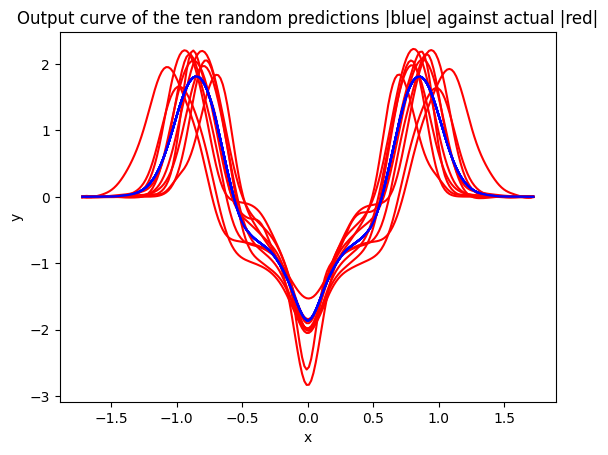

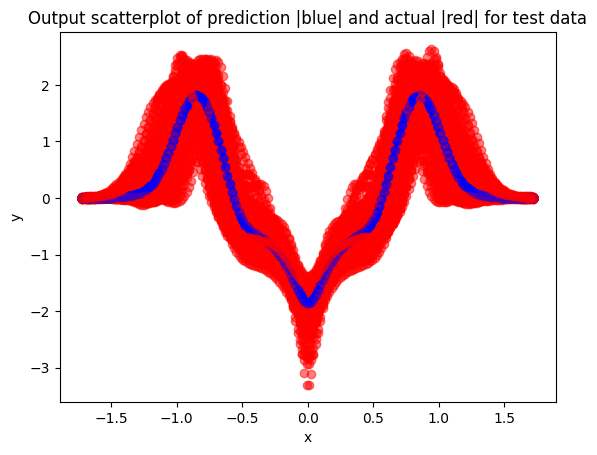

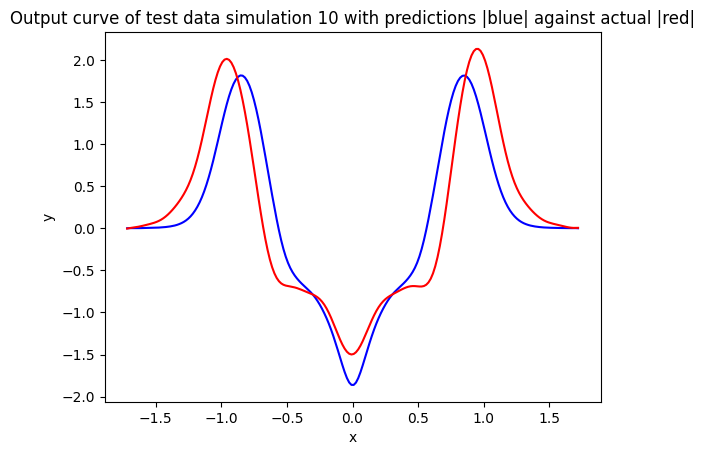

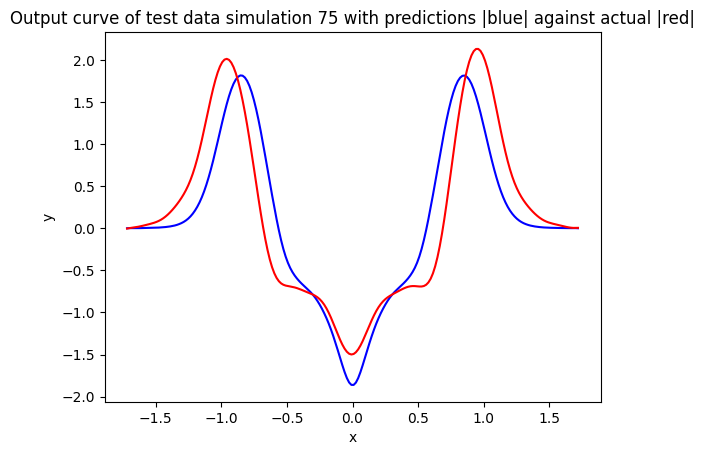

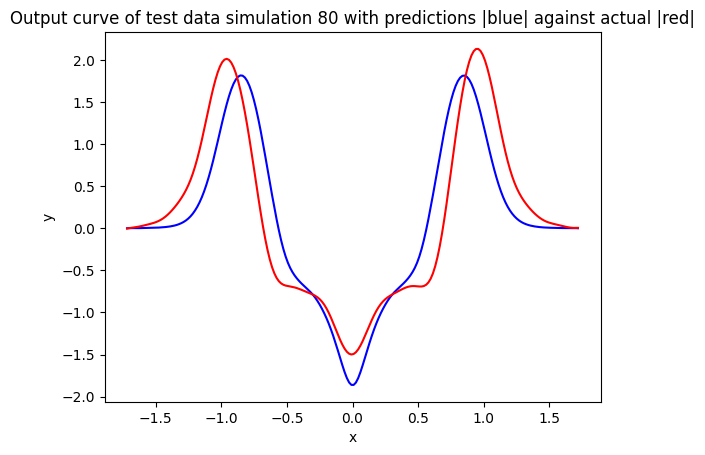

In [164]:
inputs = keras.Input(shape=(50,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
outputs = layers.Dense(100)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=50),
             TensorBoard(log_dir='model_10_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(TD_pca, test_output_values, model.predict(test_input_values))))
print('')
plots(TD_pca, test_output_values, model.predict(test_input_values))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense_11 (Dense)            (None, 2000)              102000    
                                                                 
 dropout_8 (Dropout)         (None, 2000)              0         
                                                                 
 dense_12 (Dense)            (None, 2000)              4002000   
                                                                 
 dropout_9 (Dropout)         (None, 2000)              0         
                                                                 
 dense_13 (Dense)            (None, 2000)              4002000   
                                                                 
 dropout_10 (Dropout)        (None, 2000)              0   

Epoch 65/1500
8/8 [==============================] - 1s 188ms/step - loss: 0.0443 - val_loss: 0.2769
Epoch 66/1500
8/8 [==============================] - 1s 188ms/step - loss: 0.0453 - val_loss: 0.2720
Epoch 67/1500
8/8 [==============================] - 1s 174ms/step - loss: 0.0370 - val_loss: 0.2766
Epoch 68/1500
8/8 [==============================] - 1s 186ms/step - loss: 0.0325 - val_loss: 0.2631
Epoch 69/1500
8/8 [==============================] - 1s 186ms/step - loss: 0.0312 - val_loss: 0.2602
Epoch 70/1500
8/8 [==============================] - 1s 188ms/step - loss: 0.0320 - val_loss: 0.2611
Epoch 71/1500
8/8 [==============================] - 3s 447ms/step - loss: 0.0323 - val_loss: 0.2624
Epoch 72/1500
8/8 [==============================] - 1s 179ms/step - loss: 0.0333 - val_loss: 0.2600
Epoch 73/1500
8/8 [==============================] - 1s 174ms/step - loss: 0.0349 - val_loss: 0.2476
Epoch 74/1500
8/8 [==============================] - 2s 196ms/step - loss: 0.0362 - val_los

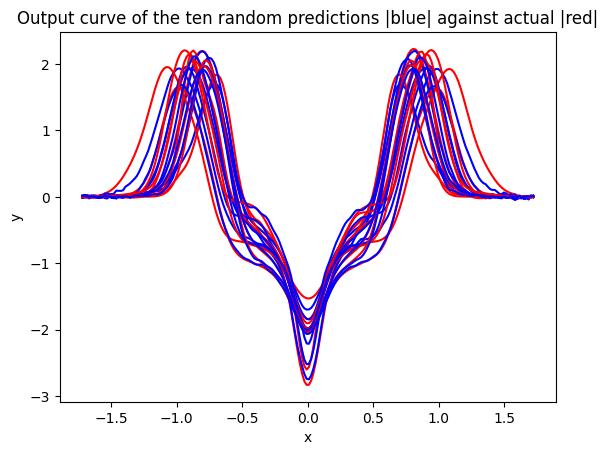

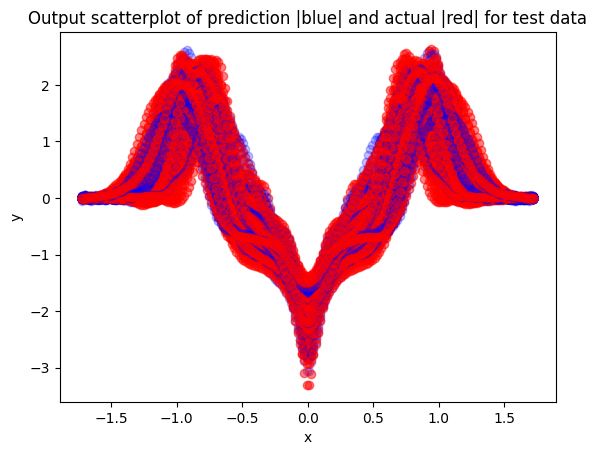

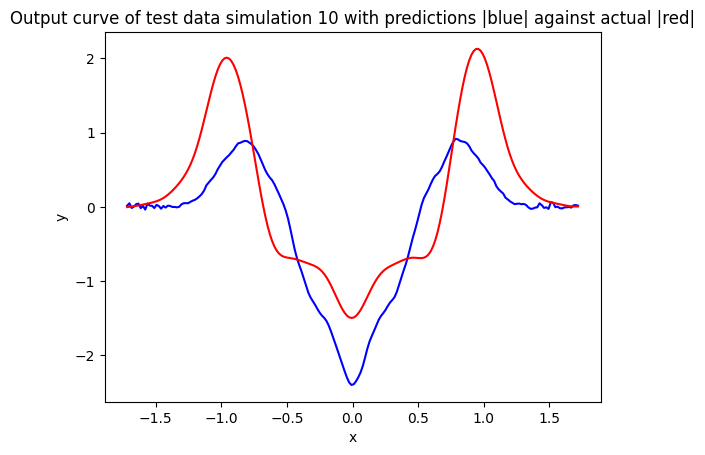

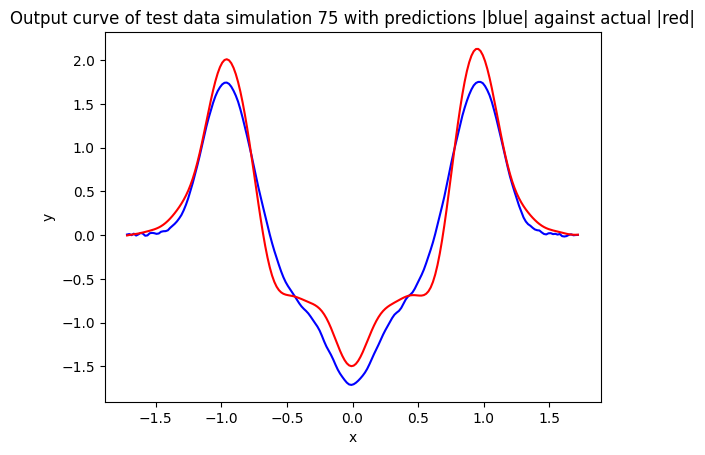

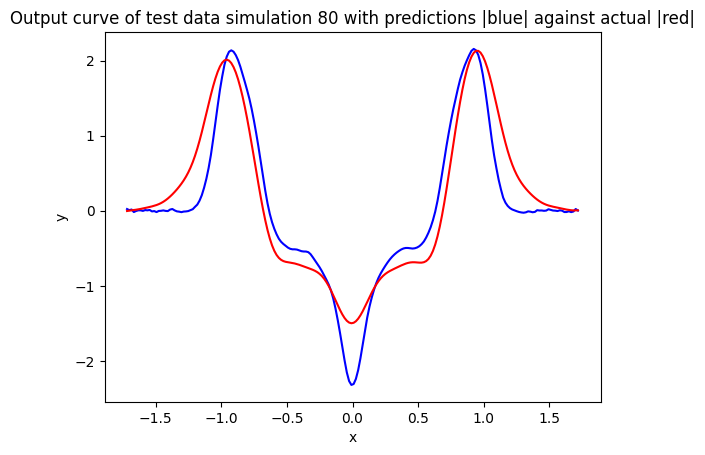

In [165]:
inputs = keras.Input(shape=(50,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
outputs = layers.Dense(100)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=25),
             TensorBoard(log_dir='model_10_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(TD_pca, test_output_values, model.predict(test_input_values))))
print('')
plots(TD_pca, test_output_values, model.predict(test_input_values))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense_16 (Dense)            (None, 2000)              102000    
                                                                 
 dropout_12 (Dropout)        (None, 2000)              0         
                                                                 
 dense_17 (Dense)            (None, 2000)              4002000   
                                                                 
 dropout_13 (Dropout)        (None, 2000)              0         
                                                                 
 dense_18 (Dense)            (None, 2000)              4002000   
                                                                 
 dropout_14 (Dropout)        (None, 2000)              0   

Epoch 65/1500
8/8 [==============================] - 1s 173ms/step - loss: 0.0112 - val_loss: 0.0461
Epoch 66/1500
8/8 [==============================] - 1s 186ms/step - loss: 0.0115 - val_loss: 0.0463
Epoch 67/1500
8/8 [==============================] - 1s 183ms/step - loss: 0.0118 - val_loss: 0.0450
Epoch 68/1500
8/8 [==============================] - 1s 180ms/step - loss: 0.0113 - val_loss: 0.0433
Epoch 69/1500
8/8 [==============================] - 1s 188ms/step - loss: 0.0117 - val_loss: 0.0494
Epoch 70/1500
8/8 [==============================] - 1s 184ms/step - loss: 0.0108 - val_loss: 0.0440
Epoch 71/1500
8/8 [==============================] - 3s 447ms/step - loss: 0.0113 - val_loss: 0.0430
Epoch 72/1500
8/8 [==============================] - 2s 194ms/step - loss: 0.0118 - val_loss: 0.0415
Epoch 73/1500
8/8 [==============================] - 1s 189ms/step - loss: 0.0115 - val_loss: 0.0468
Epoch 74/1500
8/8 [==============================] - 1s 174ms/step - loss: 0.0110 - val_los

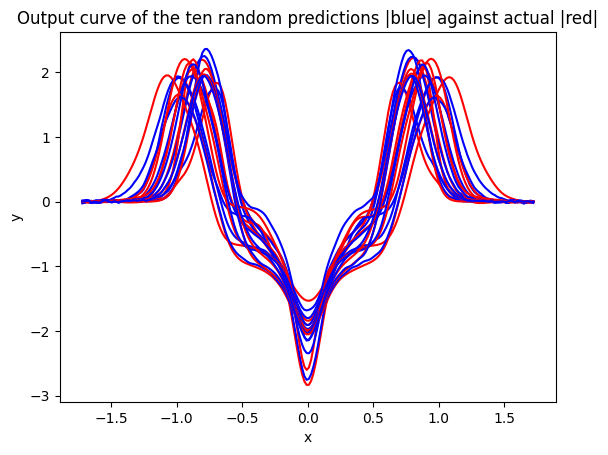

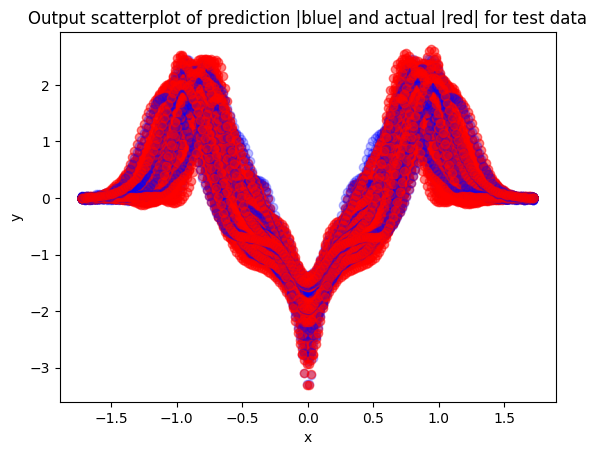

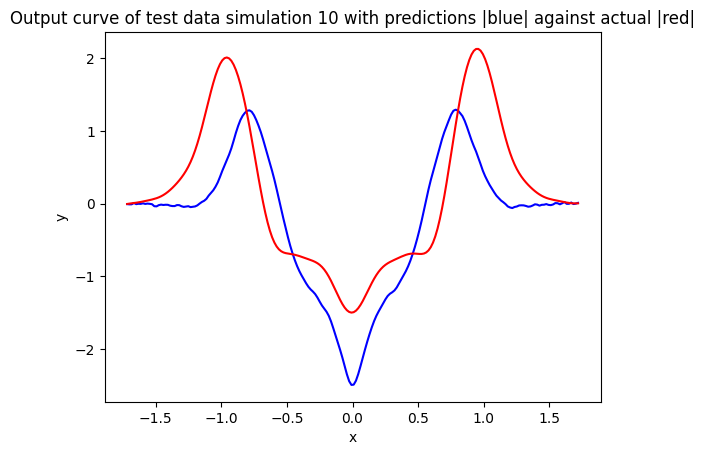

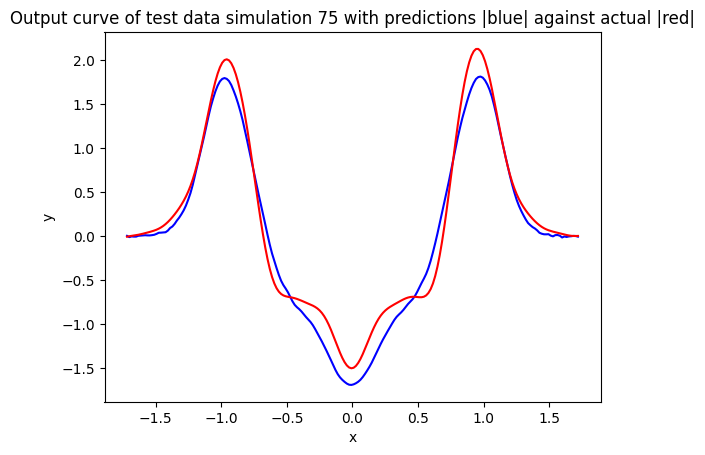

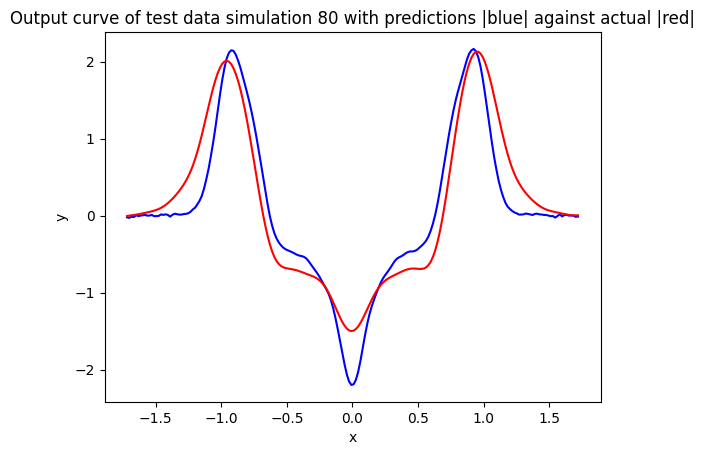

In [166]:
inputs = keras.Input(shape=(50,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
outputs = layers.Dense(100)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='huber_loss')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=25),
             TensorBoard(log_dir='model_10_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(TD_pca, test_output_values, model.predict(test_input_values))))
print('')
plots(TD_pca, test_output_values, model.predict(test_input_values))

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense_21 (Dense)            (None, 2000)              102000    
                                                                 
 dropout_16 (Dropout)        (None, 2000)              0         
                                                                 
 dense_22 (Dense)            (None, 2000)              4002000   
                                                                 
 dropout_17 (Dropout)        (None, 2000)              0         
                                                                 
 dense_23 (Dense)            (None, 2000)              4002000   
                                                                 
 dropout_18 (Dropout)        (None, 2000)              0   

8/8 [==============================] - 2s 291ms/step - loss: 0.0152 - val_loss: 0.0483
Epoch 60/1500
8/8 [==============================] - 2s 290ms/step - loss: 0.0156 - val_loss: 0.0448
Epoch 61/1500
8/8 [==============================] - 5s 722ms/step - loss: 0.0161 - val_loss: 0.0448
Epoch 62/1500
8/8 [==============================] - 2s 297ms/step - loss: 0.0167 - val_loss: 0.0483
Epoch 63/1500
8/8 [==============================] - 2s 276ms/step - loss: 0.0175 - val_loss: 0.0443
Epoch 64/1500
8/8 [==============================] - 2s 294ms/step - loss: 0.0144 - val_loss: 0.0488
Epoch 65/1500
8/8 [==============================] - 2s 290ms/step - loss: 0.0148 - val_loss: 0.0445
Epoch 66/1500
8/8 [==============================] - 2s 297ms/step - loss: 0.0150 - val_loss: 0.0436
Epoch 67/1500
8/8 [==============================] - 2s 291ms/step - loss: 0.0154 - val_loss: 0.0459
Epoch 68/1500
8/8 [==============================] - 2s 289ms/step - loss: 0.0138 - val_loss: 0.0444
Epoc

Epoch 140/1500
8/8 [==============================] - 2s 279ms/step - loss: 0.0073 - val_loss: 0.0456
Epoch 141/1500
8/8 [==============================] - 5s 719ms/step - loss: 0.0077 - val_loss: 0.0518
Epoch 142/1500
8/8 [==============================] - 2s 294ms/step - loss: 0.0087 - val_loss: 0.0468
Epoch 143/1500
8/8 [==============================] - 2s 279ms/step - loss: 0.0076 - val_loss: 0.0465
Epoch 144/1500
8/8 [==============================] - 2s 292ms/step - loss: 0.0081 - val_loss: 0.0465
Epoch 145/1500
8/8 [==============================] - 2s 285ms/step - loss: 0.0086 - val_loss: 0.0458
Epoch 146/1500
8/8 [==============================] - 2s 288ms/step - loss: 0.0080 - val_loss: 0.0510
Epoch 147/1500
8/8 [==============================] - 2s 277ms/step - loss: 0.0080 - val_loss: 0.0443
Epoch 148/1500
8/8 [==============================] - 2s 290ms/step - loss: 0.0077 - val_loss: 0.0460
Epoch 149/1500
8/8 [==============================] - 2s 290ms/step - loss: 0.0075

8/8 [==============================] - 2s 288ms/step - loss: 0.0060 - val_loss: 0.0453
Epoch 221/1500
8/8 [==============================] - 5s 711ms/step - loss: 0.0066 - val_loss: 0.0467
Epoch 222/1500
8/8 [==============================] - 2s 294ms/step - loss: 0.0061 - val_loss: 0.0460
Epoch 223/1500
8/8 [==============================] - 2s 287ms/step - loss: 0.0056 - val_loss: 0.0456
Epoch 224/1500
8/8 [==============================] - 2s 292ms/step - loss: 0.0052 - val_loss: 0.0480
Epoch 225/1500
8/8 [==============================] - 2s 290ms/step - loss: 0.0052 - val_loss: 0.0478
Epoch 226/1500
8/8 [==============================] - 2s 291ms/step - loss: 0.0054 - val_loss: 0.0472
Epoch 227/1500
8/8 [==============================] - 2s 287ms/step - loss: 0.0047 - val_loss: 0.0495
Epoch 228/1500
8/8 [==============================] - 2s 289ms/step - loss: 0.0044 - val_loss: 0.0475
Epoch 229/1500
8/8 [==============================] - 2s 294ms/step - loss: 0.0044 - val_loss: 0.

8/8 [==============================] - 2s 297ms/step - loss: 0.0054 - val_loss: 0.0485
Epoch 301/1500
8/8 [==============================] - 5s 736ms/step - loss: 0.0059 - val_loss: 0.0465
Epoch 302/1500
8/8 [==============================] - 3s 324ms/step - loss: 0.0056 - val_loss: 0.0473
Epoch 303/1500
8/8 [==============================] - 2s 308ms/step - loss: 0.0051 - val_loss: 0.0449
Epoch 304/1500
8/8 [==============================] - 2s 299ms/step - loss: 0.0054 - val_loss: 0.0461
Epoch 305/1500
8/8 [==============================] - 3s 424ms/step - loss: 0.0051 - val_loss: 0.0488
Epoch 306/1500
8/8 [==============================] - 2s 295ms/step - loss: 0.0065 - val_loss: 0.0505
Epoch 307/1500
8/8 [==============================] - 2s 298ms/step - loss: 0.0065 - val_loss: 0.0510
Epoch 308/1500
8/8 [==============================] - 2s 298ms/step - loss: 0.0069 - val_loss: 0.0513
Epoch 309/1500
8/8 [==============================] - 2s 278ms/step - loss: 0.0068 - val_loss: 0.

8/8 [==============================] - 2s 316ms/step - loss: 0.0043 - val_loss: 0.0472
Epoch 381/1500
8/8 [==============================] - 6s 769ms/step - loss: 0.0049 - val_loss: 0.0519
Epoch 382/1500
8/8 [==============================] - 2s 311ms/step - loss: 0.0044 - val_loss: 0.0484
Epoch 383/1500
8/8 [==============================] - 2s 305ms/step - loss: 0.0047 - val_loss: 0.0508
Epoch 384/1500
8/8 [==============================] - 2s 308ms/step - loss: 0.0043 - val_loss: 0.0491
Epoch 385/1500
8/8 [==============================] - 2s 320ms/step - loss: 0.0046 - val_loss: 0.0473
Epoch 386/1500
8/8 [==============================] - 2s 310ms/step - loss: 0.0042 - val_loss: 0.0463
Epoch 387/1500
8/8 [==============================] - 2s 312ms/step - loss: 0.0038 - val_loss: 0.0484
Epoch 388/1500
8/8 [==============================] - 2s 310ms/step - loss: 0.0046 - val_loss: 0.0452
Epoch 389/1500
8/8 [==============================] - 2s 319ms/step - loss: 0.0039 - val_loss: 0.

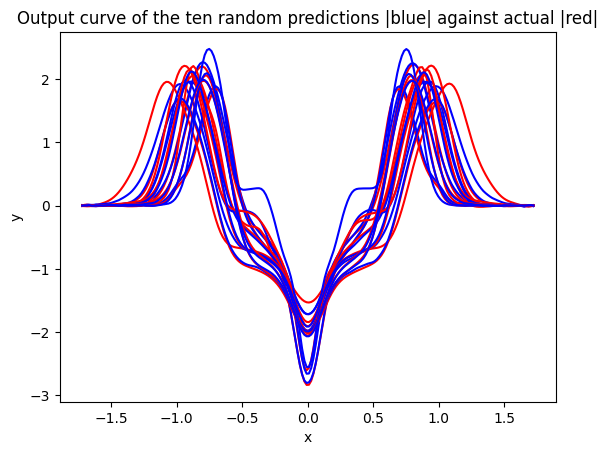

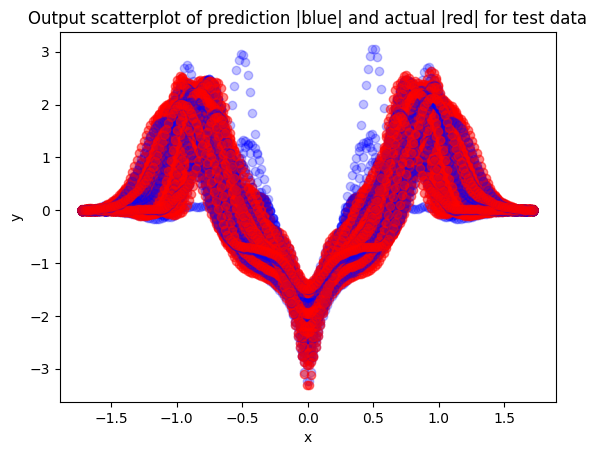

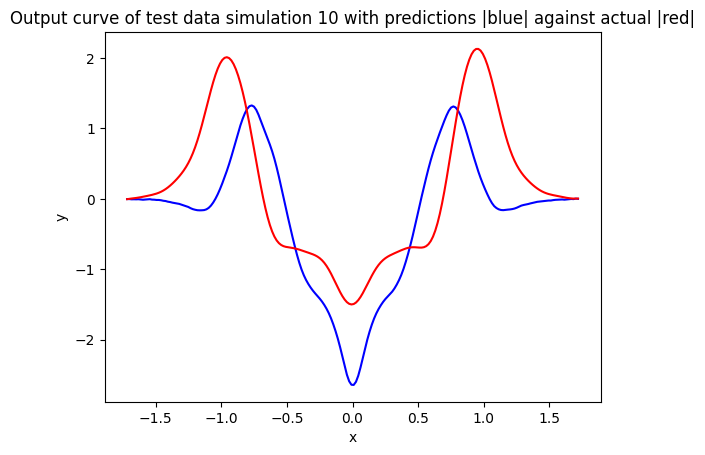

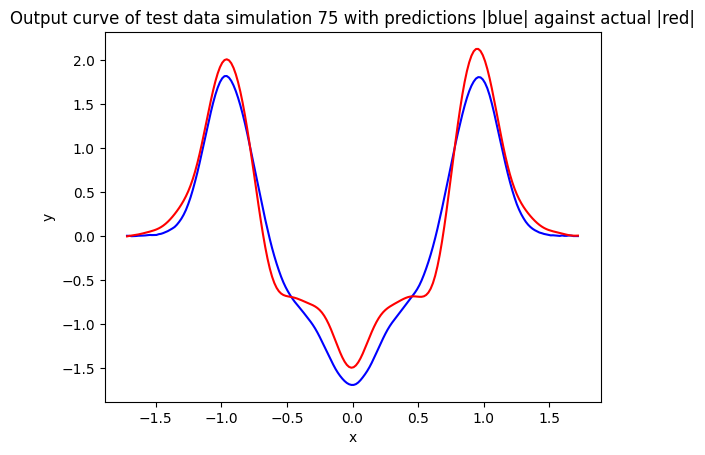

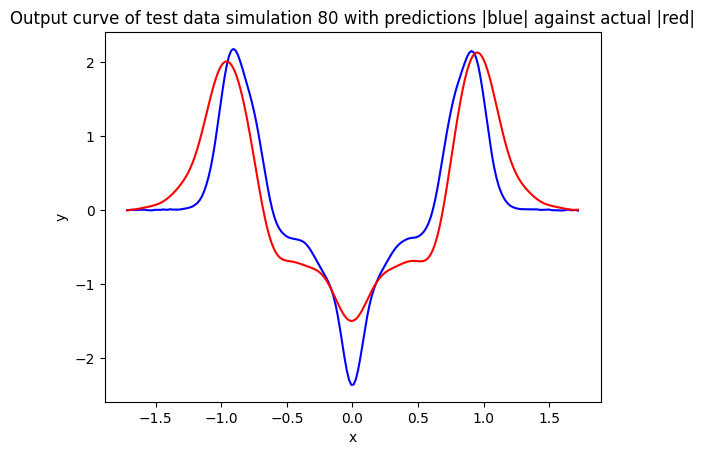

In [167]:
inputs = keras.Input(shape=(50,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
outputs = layers.Dense(100)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='huber_loss')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_10_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(TD_pca, test_output_values, model.predict(test_input_values))))
print('')
plots(TD_pca, test_output_values, model.predict(test_input_values))